#  T-20 World Cup 2022 Data Analysis

### Importing the necessary libraries

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Load the Dataset**

In [48]:
df = pd.read_csv('T-20 World cup 2022.csv')
df.sample(5)

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
6291,19010,1298149,IRE v SL,IRE,SL,IRE,1,10,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Down the track, manages to connect with the dr...",NaN,NaN
7844,213050,1298143,NED v SL,SL,NED,NED,2,14,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"And ANOTHER sweep, this time he gets a slight ...",NaN,NaN
8947,117040,1298138,IRE v ZIM,ZIM,IRE,ZIM,1,18,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Raza backs away from leg now and slaps a lengt...,NaN,<p>New bat being run out now for Raza. Trades ...
7228,112010,1298145,IRE v WI,WI,IRE,WI,1,13,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Full on off, driven to cover",<p>Around</p>,NaN
6309,112010,1298149,IRE v SL,IRE,SL,IRE,1,13,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Tucks a length ball to midwicket,NaN,NaN


### **Dataset Exploration**

In [49]:
df.shape

(9814, 44)

In [50]:
df.columns

Index(['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt', 'text', 'preText', 'postText'],
      dtype='object')

In [51]:
df.duplicated()
df.drop_duplicates(inplace= True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9813 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9813 non-null   int64  
 1   match_id           9813 non-null   int64  
 2   match_name         9813 non-null   object 
 3   home_team          9813 non-null   object 
 4   away_team          9813 non-null   object 
 5   current_innings    9813 non-null   object 
 6   innings_id         9813 non-null   int64  
 7   over               9813 non-null   int64  
 8   ball               9813 non-null   int64  
 9   runs               9813 non-null   int64  
 10  shortText          9813 non-null   object 
 11  isBoundary         9813 non-null   bool   
 12  isWide             9813 non-null   bool   
 13  isNoball           9813 non-null   bool   
 14  batsman1_id        9813 non-null   int64  
 15  batsman1_name      9813 non-null   object 
 16  batsman1_runs      9813 non-n

In [67]:
df.isnull().sum()

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
batting_team            0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9262
wkt_batsman_name     9262
wkt_bowler_name      9262
wkt_batsman_runs     9262
wkt_batsman_

**T20 WC participated Teams**

In [68]:
df.rename(columns={'current_innings':'batting_team'}, inplace= True)
df['batting_team'].unique()

array(['PAK', 'ENG', 'INDIA', 'NZ', 'ZIM', 'BAN', 'NED', 'SA', 'SL',
       'AUS', 'AFG', 'IRE', 'SCOT', 'WI', 'UAE', 'NAM'], dtype=object)

We will focus on Top 10 teams so that our analysis is short and clear

In [69]:
top10= ['INDIA','ENG','PAK','NZ','BAN','SA','SL','AUS','WI','AFG']

In [70]:
country = df['batting_team'].unique()
print(country)

['PAK' 'ENG' 'INDIA' 'NZ' 'ZIM' 'BAN' 'NED' 'SA' 'SL' 'AUS' 'AFG' 'IRE'
 'SCOT' 'WI' 'UAE' 'NAM']


In [71]:
print(df['match_name'].unique())

['ENG v PAK' 'ENG v INDIA' 'NZ v PAK' 'INDIA v ZIM' 'BAN v PAK' 'NED v SA'
 'ENG v SL' 'AUS v AFG' 'IRE v NZ' 'PAK v SA' 'BAN v INDIA' 'NED v ZIM'
 'ENG v NZ' 'AFG v SL' 'AUS v IRE' 'INDIA v SA' 'NED v PAK' 'BAN v ZIM'
 'NZ v SL' 'PAK v ZIM' 'INDIA v NED' 'BAN v SA' 'ENG v IRE' 'AUS v SL'
 'SA v ZIM' 'BAN v NED' 'INDIA v PAK' 'IRE v SL' 'AFG v ENG' 'AUS v NZ'
 'SCOT v ZIM' 'IRE v WI' 'NAM v UAE' 'NED v SL' 'WI v ZIM' 'IRE v SCOT'
 'SL v UAE' 'NAM v NED' 'IRE v ZIM' 'SCOT v WI' 'NED v UAE' 'NAM v SL']


In [72]:
# Split 'match_name' into two new columns: 'team1' and 'team2'
df[['team1', 'team2']] = df['match_name'].str.split(' v ', expand=True)

# Add a new column 'bowling_team' with the team not present in 'current_inning'
df['bowling_team'] = df.apply(lambda row: row['team2'] if row['batting_team'] == row['team1'] else row['team1'], axis=1)

df.drop(columns= ['team1', 'team2'], inplace= True )
df['bowling_team'].unique()

array(['ENG', 'PAK', 'INDIA', 'NZ', 'ZIM', 'BAN', 'SA', 'NED', 'SL',
       'AFG', 'AUS', 'IRE', 'SCOT', 'WI', 'NAM', 'UAE'], dtype=object)

In [73]:
def filtered_df(df, columns, top_teams):
    condition = df['batting_team'].isin(top_teams) & df['bowling_team'].isin(top_teams)
    return df.loc[condition, columns]

**World Top10 highest scorer batsman**

In [74]:
batting_df1= ['batting_team','batsman1_name','batsman1_runs']
for i in country:
    filtered1 = filtered_df(df,batting_df1,top10)
filtered1.rename(columns={'batsman1_name':'batsman_name'}, inplace=True)
filtered1=filtered1.groupby('batsman_name').max().sort_values(by='batsman1_runs',ascending=False)[:10]
filtered1

,batting_team,batsman1_runs
batsman_name,,
Rilee Rossouw,SA,109
Glenn Phillips,NZ,104
Devon Conway,NZ,92
Alex Hales,ENG,86
Virat Kohli,INDIA,82
Jos Buttler,ENG,80
Suryakumar Yadav,INDIA,68
Pathum Nissanka,SL,67
Dhananjaya de Silva,SL,66


In [75]:
batting_df2= ['batting_team','batsman2_name','batsman2_runs']
for i in country:
        filtered2 = filtered_df(df,batting_df2,top10)
filtered2.rename(columns={'batsman2_name':'batsman_name'}, inplace=True)
filtered2=filtered2.groupby('batsman_name').max().sort_values(by='batsman2_runs',ascending=False)[:10]
filtered2

,batting_team,batsman2_runs
batsman_name,,
Rilee Rossouw,SA,107
Glenn Phillips,NZ,104
Devon Conway,NZ,92
Alex Hales,ENG,86
Virat Kohli,INDIA,82
Jos Buttler,ENG,74
Pathum Nissanka,SL,67
Suryakumar Yadav,INDIA,66
Dhananjaya de Silva,SL,60


In [76]:
# Merge the dataframes on the 'batsman1_name' and 'batsman2_name' columns

merged_df = pd.merge(filtered1, filtered2, on=('batsman_name','batting_team'))
merged_df

,batting_team,batsman1_runs,batsman2_runs
batsman_name,,,
Rilee Rossouw,SA,109,107
Glenn Phillips,NZ,104,104
Devon Conway,NZ,92,92
Alex Hales,ENG,86,86
Virat Kohli,INDIA,82,82
Jos Buttler,ENG,80,74
Suryakumar Yadav,INDIA,68,66
Pathum Nissanka,SL,67,67
Dhananjaya de Silva,SL,66,60


In [77]:
#Add the corresponding columns and
merged_df['batsman_runs'] = merged_df['batsman1_runs'] + merged_df['batsman2_runs']
 #Dropping the extra columns
merged_df.drop(columns=['batsman1_runs','batsman2_runs'], inplace= True)
merged_df 

# Display the result
result = merged_df.groupby('batsman_name').max().sort_values(by='batsman_runs',ascending=False)[:10]
result

,batting_team,batsman_runs
batsman_name,,
Rilee Rossouw,SA,216
Glenn Phillips,NZ,208
Devon Conway,NZ,184
Alex Hales,ENG,172
Virat Kohli,INDIA,164
Jos Buttler,ENG,154
Pathum Nissanka,SL,134
Suryakumar Yadav,INDIA,134
Dhananjaya de Silva,SL,126


**Highest Score of Every Indian Batsman**

In [78]:
df.loc[df['batting_team'] =='INDIA',['batting_team','batsman1_name','batsman1_runs']].groupby('batsman1_name').max().sort_values(by='batsman1_runs',ascending=False)[:5]

,batting_team,batsman1_runs
batsman1_name,,
Virat Kohli,INDIA,82
Suryakumar Yadav,INDIA,68
Hardik Pandya,INDIA,63
Rohit Sharma,INDIA,53
KL Rahul,INDIA,51


**Match-wise batting performance** /n
But our aim is to see how these batters have fared in every match they've played in. So, we'll find their cumulative sum:

In [79]:
top_runs = df[['batsman1_name','runs']].loc[df['batting_team']=='INDIA'].groupby('batsman1_name').sum().sort_values(by='runs',ascending=False)[0:5]
top_run_getters = top_runs.index
top_run_getters

Index(['Virat Kohli', 'Suryakumar Yadav', 'Hardik Pandya', 'KL Rahul',
       'Rohit Sharma'],
      dtype='object', name='batsman1_name')

In [80]:
top5_ind = df[['match_name','batsman1_name','batsman1_runs']].loc[(df['batting_team']=='INDIA') & (df['batsman1_name'].isin(top_run_getters))].groupby(['match_name','batsman1_name']).max().sort_index().unstack()
top5_ind = top5_ind.cumsum()
top5_ind

batsman1_runs                                                   
batsman1_name Hardik Pandya KL Rahul Rohit Sharma Suryakumar Yadav Virat Kohli
match_name                                                                    
BAN v INDIA             5.0     50.0          2.0             30.0        64.0
ENG v INDIA            68.0     55.0         29.0             44.0       114.0
INDIA v NED             NaN     64.0         82.0             95.0       176.0
INDIA v PAK           108.0     68.0         86.0            110.0       258.0
INDIA v SA            110.0     77.0        101.0            178.0       270.0
INDIA v ZIM           128.0    128.0        116.0            233.0       296.0

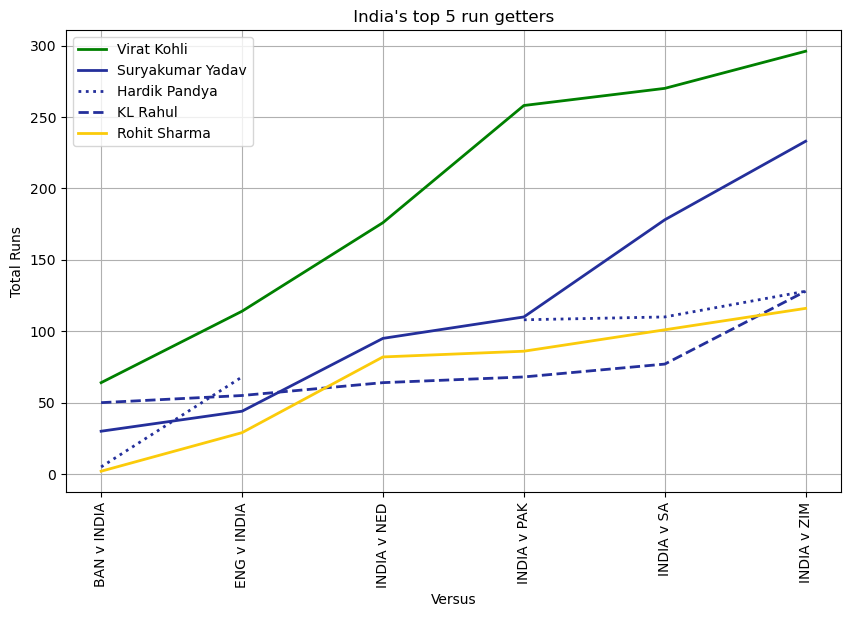

In [81]:
plt.figure(figsize=(10,6))
plt.plot(top5_ind[('batsman1_runs','Virat Kohli')], label='Virat Kohli', color='Green', linewidth=2)
plt.plot(top5_ind[('batsman1_runs','Suryakumar Yadav')], label='Suryakumar Yadav', color='#242F9B', linewidth=2)
plt.plot(top5_ind[('batsman1_runs','Hardik Pandya')], label='Hardik Pandya', color='#242F9B', linewidth=2, linestyle=':')
plt.plot(top5_ind[('batsman1_runs','KL Rahul')], label='KL Rahul', color='#242F9B', linewidth=2, linestyle='--')
plt.plot(top5_ind[('batsman1_runs','Rohit Sharma')], label='Rohit Sharma', color='#FBCB0A', linewidth=2)

plt.title(" India's top 5 run getters ")
plt.xticks(rotation=90)
plt.xlabel('Versus')
plt.ylabel('Total Runs')
plt.legend()
plt.grid()
plt.savefig('India top scorers', bbox_inches='tight')
plt.show()

So satisfying to see! Virat has been incredibly consistent with his batting. Suryakumar Yadav has been amazing too with his finishing. 

**Top 10 bowlers in world**

In [83]:
bowling_df= ['bowling_team','bowler1_name','bowler1_wkts']
for i in country:
     filtered = filtered_df(df,bowling_df,top10)
filtered.groupby('bowler1_name').max().sort_values(by='bowler1_wkts',ascending=False)[:10]

,bowling_team,bowler1_wkts
bowler1_name,,
Sam Curran,ENG,5
Trent Boult,NZ,4
Anrich Nortje,SA,4
Lungi Ngidi,SA,4
Shaheen Shah Afridi,PAK,4
Wayne Parnell,SA,3
Hardik Pandya,INDIA,3
Mark Wood,ENG,3
Mitchell Santner,NZ,3


In [84]:
df.loc[df['bowling_team'] =='INDIA',['bowling_team','bowler1_name','bowler1_wkts']].groupby('bowler1_name').max().sort_values(by='bowler1_wkts',ascending=False)[:5]

,bowling_team,bowler1_wkts
bowler1_name,,
Arshdeep Singh,INDIA,3
Hardik Pandya,INDIA,3
Ravichandran Ashwin,INDIA,3
Axar Patel,INDIA,2
Bhuvneshwar Kumar,INDIA,2


Since our analysis is mostly on INDIA, we create a dataframe containing only INDIA's games:

In [86]:
IND_results=df.loc[(df['home_team']=='INDIA') | (df['away_team']=='INDIA'), :].copy()
IND_results.drop(columns=['home_team','away_team'], inplace= True)
IND_results.columns

Index(['comment_id', 'match_id', 'match_name', 'batting_team', 'innings_id',
       'over', 'ball', 'runs', 'shortText', 'isBoundary', 'isWide', 'isNoball',
       'batsman1_id', 'batsman1_name', 'batsman1_runs', 'batsman1_balls',
       'bowler1_id', 'bowler1_name', 'bowler1_overs', 'bowler1_maidens',
       'bowler1_runs', 'bowler1_wkts', 'batsman2_id', 'batsman2_name',
       'batsman2_runs', 'batsman2_balls', 'bowler2_id', 'bowler2_name',
       'bowler2_overs', 'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts',
       'wicket_id', 'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText', 'bowling_team'],
      dtype='object')

Let's now do the same to see India's bowlers performance.

In [88]:
ind_match_id=IND_results['match_id']

ind_match_id

243     1298178
244     1298178
245     1298178
246     1298178
247     1298178
         ...   
6231    1298150
6232    1298150
6233    1298150
6234    1298150
6235    1298150
Name: match_id, Length: 1417, dtype: int64

List of all bowlers who bowled more than one ball

In [89]:
ind_df = df.loc[df['match_id'].isin(ind_match_id)]
ind_bowling = ind_df.loc[(ind_df['batting_team']!='INDIA') & (ind_df['wkt_text']!="")]

ind_top_bowlers = ind_bowling['bowler1_name'].value_counts()[:].index
ind_top_bowlers

Index(['Arshdeep Singh', 'Mohammed Shami', 'Ravichandran Ashwin',
       'Bhuvneshwar Kumar', 'Hardik Pandya', 'Axar Patel'],
      dtype='object', name='bowler1_name')

In [90]:
ind_bowling.sample(5)

,comment_id,match_id,match_name,home_team,away_team,batting_team,innings_id,over,ball,runs,...,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText,bowling_team
854,23070,1298176,INDIA v ZIM,INDIA,ZIM,ZIM,2,4,6,0,...,NaN,NaN,NaN,NaN,NaN,False,"lovely line and length, nip and swing from a f...",NaN,NaN,INDIA
4960,215060,1298157,INDIA v NED,INDIA,NED,NED,2,16,6,0,...,NaN,NaN,NaN,NaN,NaN,False,"length ball outside off, jags away off the dec...",NaN,NaN,INDIA
6079,114070,1298150,INDIA v PAK,PAK,INDIA,PAK,1,15,6,1,...,NaN,NaN,NaN,NaN,NaN,False,looks to create room and Ashwin follows with a...,NaN,NaN,INDIA
837,21050,1298176,INDIA v ZIM,INDIA,ZIM,ZIM,2,2,4,0,...,Regis Chakabva,Arshdeep Singh,0.0,6.0,RW Chakabva b Arshdeep Singh 0 (9m 6b 0x4 0x6...,False,<B>ping! Next batter please!</B> Exceptional b...,NaN,"<p>Susan: ""I think both team are playing 18.3 ...",INDIA
6097,117050,1298150,INDIA v PAK,PAK,INDIA,PAK,1,18,5,1,...,NaN,NaN,NaN,NaN,NaN,False,"full, angling down leg, flicked to the left of...",NaN,NaN,INDIA


In [91]:
ind_bowling = ind_bowling.loc[ind_bowling['bowler1_name'].isin(ind_top_bowlers)]
ind_bowling = ind_bowling[['match_id','bowler1_name','bowler1_wkts']].groupby(['match_id','bowler1_name']).max().unstack()
ind_bowling=ind_bowling.cumsum()
ind_bowling

bowler1_wkts                                             \
bowler1_name Arshdeep Singh Axar Patel Bhuvneshwar Kumar Hardik Pandya   
match_id                                                                 
1298150                 3.0        0.0               1.0           3.0   
1298157                 5.0        2.0               3.0           3.0   
1298164                 7.0        NaN               3.0           4.0   
1298169                 9.0        2.0               3.0           6.0   
1298176                10.0        3.0               4.0           8.0   
1298178                10.0        3.0               4.0           8.0   

                                                 
bowler1_name Mohammed Shami Ravichandran Ashwin  
match_id                                         
1298150                 1.0                 0.0  
1298157                 2.0                 2.0  
1298164                 3.0                 3.0  
1298169                 4.0                 3.0  
1298176                 6.0                 6.0  
1298178                 6.0                 6.0

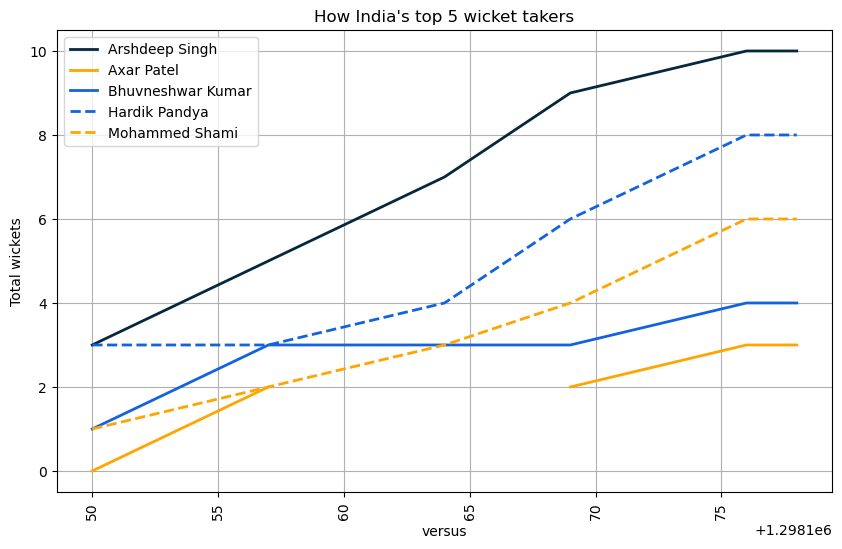

In [92]:
plt.figure(figsize=(10,6))
# plt.style.use('seaborn')
plt.plot(ind_bowling['bowler1_wkts','Arshdeep Singh'],color='#06283D',linewidth=2, label='Arshdeep Singh')
plt.plot(ind_bowling['bowler1_wkts','Axar Patel'],color='#FFA500',linewidth=2, label='Axar Patel')
plt.plot(ind_bowling['bowler1_wkts','Bhuvneshwar Kumar'],color='#1363DF',linewidth=2, label='Bhuvneshwar Kumar')
plt.plot(ind_bowling['bowler1_wkts','Hardik Pandya'],color='#1363DF',linewidth=2, linestyle='--', label='Hardik Pandya')
plt.plot(ind_bowling['bowler1_wkts','Mohammed Shami'],color='#FFA500',linestyle='--',linewidth=2, label='Mohammed Shami')
plt.xlabel('versus')
plt.ylabel('Total wickets')
plt.xticks(rotation=90)
plt.title("How India's top 5 wicket takers")
plt.legend()
plt.grid(True)
# plt.savefig('top wicket takers.png',bbox_inches='tight')
plt.show()

Arshdeep Singh stands out by a mile! He's been INDIA's best bowling asset this season. Hardik Pandya had a decent run in this season too.

**Wicket Analysis**

In [93]:
wkt_df= df[['match_id','match_name','batting_team','bowling_team','wicket_id', 'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text']]
wkt_df

,match_id,match_name,batting_team,bowling_team,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text
0,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
1,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
2,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
3,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
4,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9809,1298135,NAM v SL,SL,NAM,NaN,NaN,NaN,NaN,NaN,NaN
9810,1298135,NAM v SL,SL,NAM,NaN,NaN,NaN,NaN,NaN,NaN
9811,1298135,NAM v SL,SL,NAM,NaN,NaN,NaN,NaN,NaN,NaN
9812,1298135,NAM v SL,SL,NAM,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
column_list = ['match_id', 'match_name', 'batting_team', 'bowling_team', 'wicket_id',
               'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text']

wkt_df = filtered_df(df, column_list, top10)
wkt_df

,match_id,match_name,batting_team,bowling_team,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text
0,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
1,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
2,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
3,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
4,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6912,1298147,AUS v NZ,AUS,NZ,379504.0,Adam Zampa,Trent Boult,0.0,2.0,A Zampa b Boult 0 (3m 2b 0x4 0x6) SR: 0.00
6913,1298147,AUS v NZ,AUS,NZ,NaN,NaN,NaN,NaN,NaN,NaN
6914,1298147,AUS v NZ,AUS,NZ,NaN,NaN,NaN,NaN,NaN,NaN
6915,1298147,AUS v NZ,AUS,NZ,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
wkt_df.isnull().sum()

match_id                0
match_name              0
batting_team            0
bowling_team            0
wicket_id            3789
wkt_batsman_name     3789
wkt_bowler_name      3789
wkt_batsman_runs     3789
wkt_batsman_balls    3789
wkt_text             3789
dtype: int64

In [97]:
wkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4005 entries, 0 to 6916
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_id           4005 non-null   int64  
 1   match_name         4005 non-null   object 
 2   batting_team       4005 non-null   object 
 3   bowling_team       4005 non-null   object 
 4   wicket_id          216 non-null    float64
 5   wkt_batsman_name   216 non-null    object 
 6   wkt_bowler_name    216 non-null    object 
 7   wkt_batsman_runs   216 non-null    float64
 8   wkt_batsman_balls  216 non-null    float64
 9   wkt_text           216 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 344.2+ KB


In [98]:
wkt_df1= wkt_df.dropna(subset=['wicket_id'],inplace= True)

In [99]:
wkt_df1

**To find the details of the wickets taken by a player**

In [101]:
'''player_name= input("Enter the name of the bowler: ")
df= wkt_df.loc[wkt_df['wkt_bowler_name']==player_name]
df
print("Total wickets taken by {} is {}.".format(player_name, df.shape[0]))'''

'player_name= input("Enter the name of the bowler: ")\ndf= wkt_df.loc[wkt_df[\'wkt_bowler_name\']==player_name]\ndf\nprint("Total wickets taken by {} is {}.".format(player_name, df.shape[0]))'

# Thank You